In [371]:
import pandas as pd
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import homogeneity_score,completeness_score,classification_report,confusion_matrix,mean_squared_error,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder,PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


pd.set_option('display.max_rows', 1300)
pd.set_option('display.max_columns', 1300)
pd.set_option('display.width', 1300)

In [372]:
# prepare data

# loop thr
trainData = pd.read_csv('CS98XRegressionTrain.csv')
trainData = pd.DataFrame(trainData)


testData = pd.read_csv('CS98XRegressionTest.csv')
testData = pd.DataFrame(testData)

#print(wholeList)

In [373]:
# check shape of the data
print('train data shape:',trainData.shape)
print('test data shape:',testData.shape)


train data shape: (453, 15)
test data shape: (114, 14)


In [374]:
# check the info of the data
print('train data info:',trainData.info())
print('test data info:',testData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB
train data info: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------   

In [375]:
# check if duplicate row exist in test data and train data

print('train data duplicated:',trainData.duplicated().any())
print('test data duplicated:',testData.duplicated().any())

train data duplicated: False
test data duplicated: False


In [376]:
# check if any NaN cell
print('train data NaN:',trainData.columns[trainData.isnull().any()])
print('test data NaN:',testData.columns[testData.isnull().any()].isnull())


train data NaN: Index(['top genre'], dtype='object')
test data NaN: [False]


In [377]:
# filter out the NaN rows 
# 1) run drop if empty found
# 2) create a new dataframe that for future use
if not(trainData.columns[trainData.isnull().any()].isnull()):
    trainDataClean = trainData.drop(trainData[trainData['top genre'].isnull()].index)
testDataClean = testData.copy()


In [378]:
# encode the object columns - train data
encoder = LabelEncoder()
encodeCols = ["title","artist","top genre"]
for col in encodeCols:
    encoder.fit(trainDataClean[col])
    trainDataClean[col] = encoder.transform(trainDataClean[col])
    
for col in encodeCols:
    encoder.fit(testDataClean[col])
    testDataClean[col] = encoder.transform(testDataClean[col])

In [379]:

print (trainDataClean.describe())


               Id       title      artist   top genre         year         bpm        nrgy        dnce          dB        live         val         dur       acous        spch         pop
count  438.000000  438.000000  438.000000  438.000000   438.000000  438.000000  438.000000  438.000000  438.000000  438.000000  438.000000  438.000000  438.000000  438.000000  438.000000
mean   227.600457  218.038813  162.383562   32.547945  1990.881279  118.326484   60.504566   59.780822   -8.787671   17.605023   59.625571  228.267123   32.191781    5.671233   61.557078
std    130.463047  125.990359   95.913047   26.075252    16.697047   25.175735   22.089660   15.404757    3.591005   13.807492   24.480160   63.426812   29.279912    5.571392   12.759353
min      1.000000    0.000000    0.000000    0.000000  1948.000000   62.000000    7.000000   18.000000  -24.000000    2.000000    6.000000   98.000000    0.000000    2.000000   26.000000
25%    116.250000  109.250000   79.250000    4.000000  1976.00000

In [380]:
print("train data - after encode:\n",trainDataClean.head())
print("test data - after encode:\n",testDataClean.head())

train data - after encode:
    Id  title  artist  top genre  year  bpm  nrgy  dnce  dB  live  val  dur  acous  spch  pop
0   1    265      54          1  1996  107    31    45  -8    13   28  150     75     3   44
2   3    160      19          1  1979  105    36    63  -9    13   67  245     11     3   77
3   4    422      18          1  1980  170    28    47 -16    13   33  232     25     3   67
4   5    138      92         68  1973  121    47    56  -8    15   40  193     45     3   63
5   6    139      40         80  2010  110    56    71  -7    12   23  223     15     6   74
test data - after encode:
     Id  title  artist  top genre  year  bpm  nrgy  dnce  dB  live  val  dur  acous  spch
0  454     66      82         20  2005  154    93    65  -3    75   74  213      1    18
1  455     17      34         31  1994  161    39    30 -15    11   14  292     26     3
2  456    102      68         31  1977   64    46    27  -7    12   18  179     38     3
3  457     50      38          

Text(0.5, 1.0, 'Corelation of all columns')

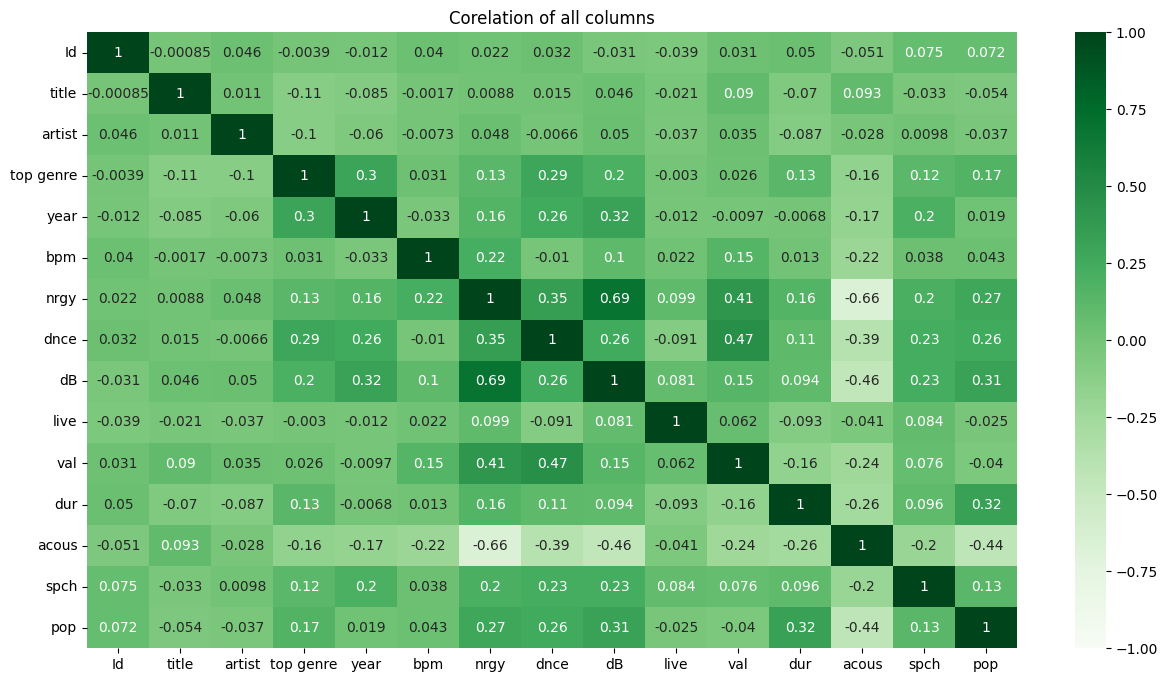

In [381]:
# corelation before remove outliner
corelation = trainDataClean.corr()
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(trainDataClean.corr(), center=0, cmap='Greens',vmin=-1, vmax=1, annot=True)
ax.set_title('Corelation of all columns')

In [382]:
th = 5
outlinerList={}
outlinerCols = trainDataClean.columns
for col in outlinerCols:
    mean = np.mean(trainDataClean[col])
    std=np.std(trainDataClean[col])
    out_list=[]
    for i in trainDataClean[col]:
        z=(i-mean)/std
        if z > th:
            out_list.append(i)
    if (out_list):
        outlinerList[col]= out_list
print("outliers : ", outlinerList)

outliers :  {'live': [93], 'spch': [38, 37, 36, 47]}


In [383]:
#extract outliner

print("before remove outliner:",trainDataClean.shape)
for key,value in outlinerList.items():
    print(key,value)
    for i in value:
        trainDataClean.drop(trainDataClean[trainDataClean[key]==i].index, inplace = True)

print("after remove outliner:",trainDataClean.shape)

before remove outliner: (438, 15)
live [93]
spch [38, 37, 36, 47]
after remove outliner: (433, 15)


In [384]:
# seperated list - train data

print('train data info:',trainDataClean.info())
print('test data info:',testData.info())

# seperate x and y
y = trainDataClean["pop"]
x = trainDataClean.drop(columns=["Id","artist","title","year","pop","top genre"])
stdScaler = StandardScaler()
xScaled = stdScaler.fit_transform(x)

# for polynomial 
polyFeat = PolynomialFeatures(degree=2, include_bias=False)
xPoly = polyFeat.fit_transform(x)
xPolyScaled = stdScaler.fit_transform(xPoly)

# for first training - scaled
xTrain, xTrainTest, yTrain, yTrainTest = train_test_split(xScaled, y, test_size=0.25, random_state=42)


# for first training - scaled poly
xTrainPoly, xTrainPolyTest, yTrainPoly, yTrainPolyTest = train_test_split(xPolyScaled, y, test_size=0.25, random_state=42)




<class 'pandas.core.frame.DataFrame'>
Int64Index: 433 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Id         433 non-null    int64
 1   title      433 non-null    int64
 2   artist     433 non-null    int64
 3   top genre  433 non-null    int64
 4   year       433 non-null    int64
 5   bpm        433 non-null    int64
 6   nrgy       433 non-null    int64
 7   dnce       433 non-null    int64
 8   dB         433 non-null    int64
 9   live       433 non-null    int64
 10  val        433 non-null    int64
 11  dur        433 non-null    int64
 12  acous      433 non-null    int64
 13  spch       433 non-null    int64
 14  pop        433 non-null    int64
dtypes: int64(15)
memory usage: 54.1 KB
train data info: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0  

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


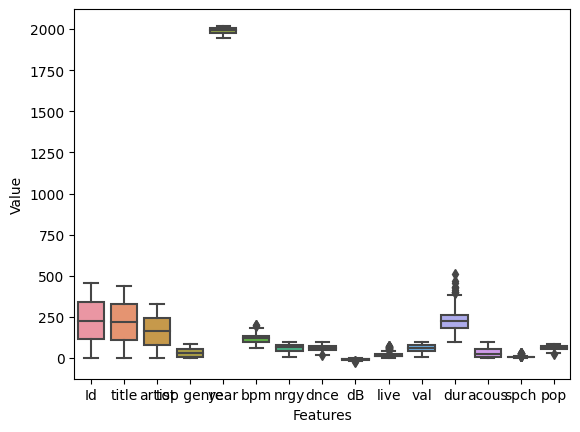

In [385]:
sns.boxplot(data=trainDataClean)
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()

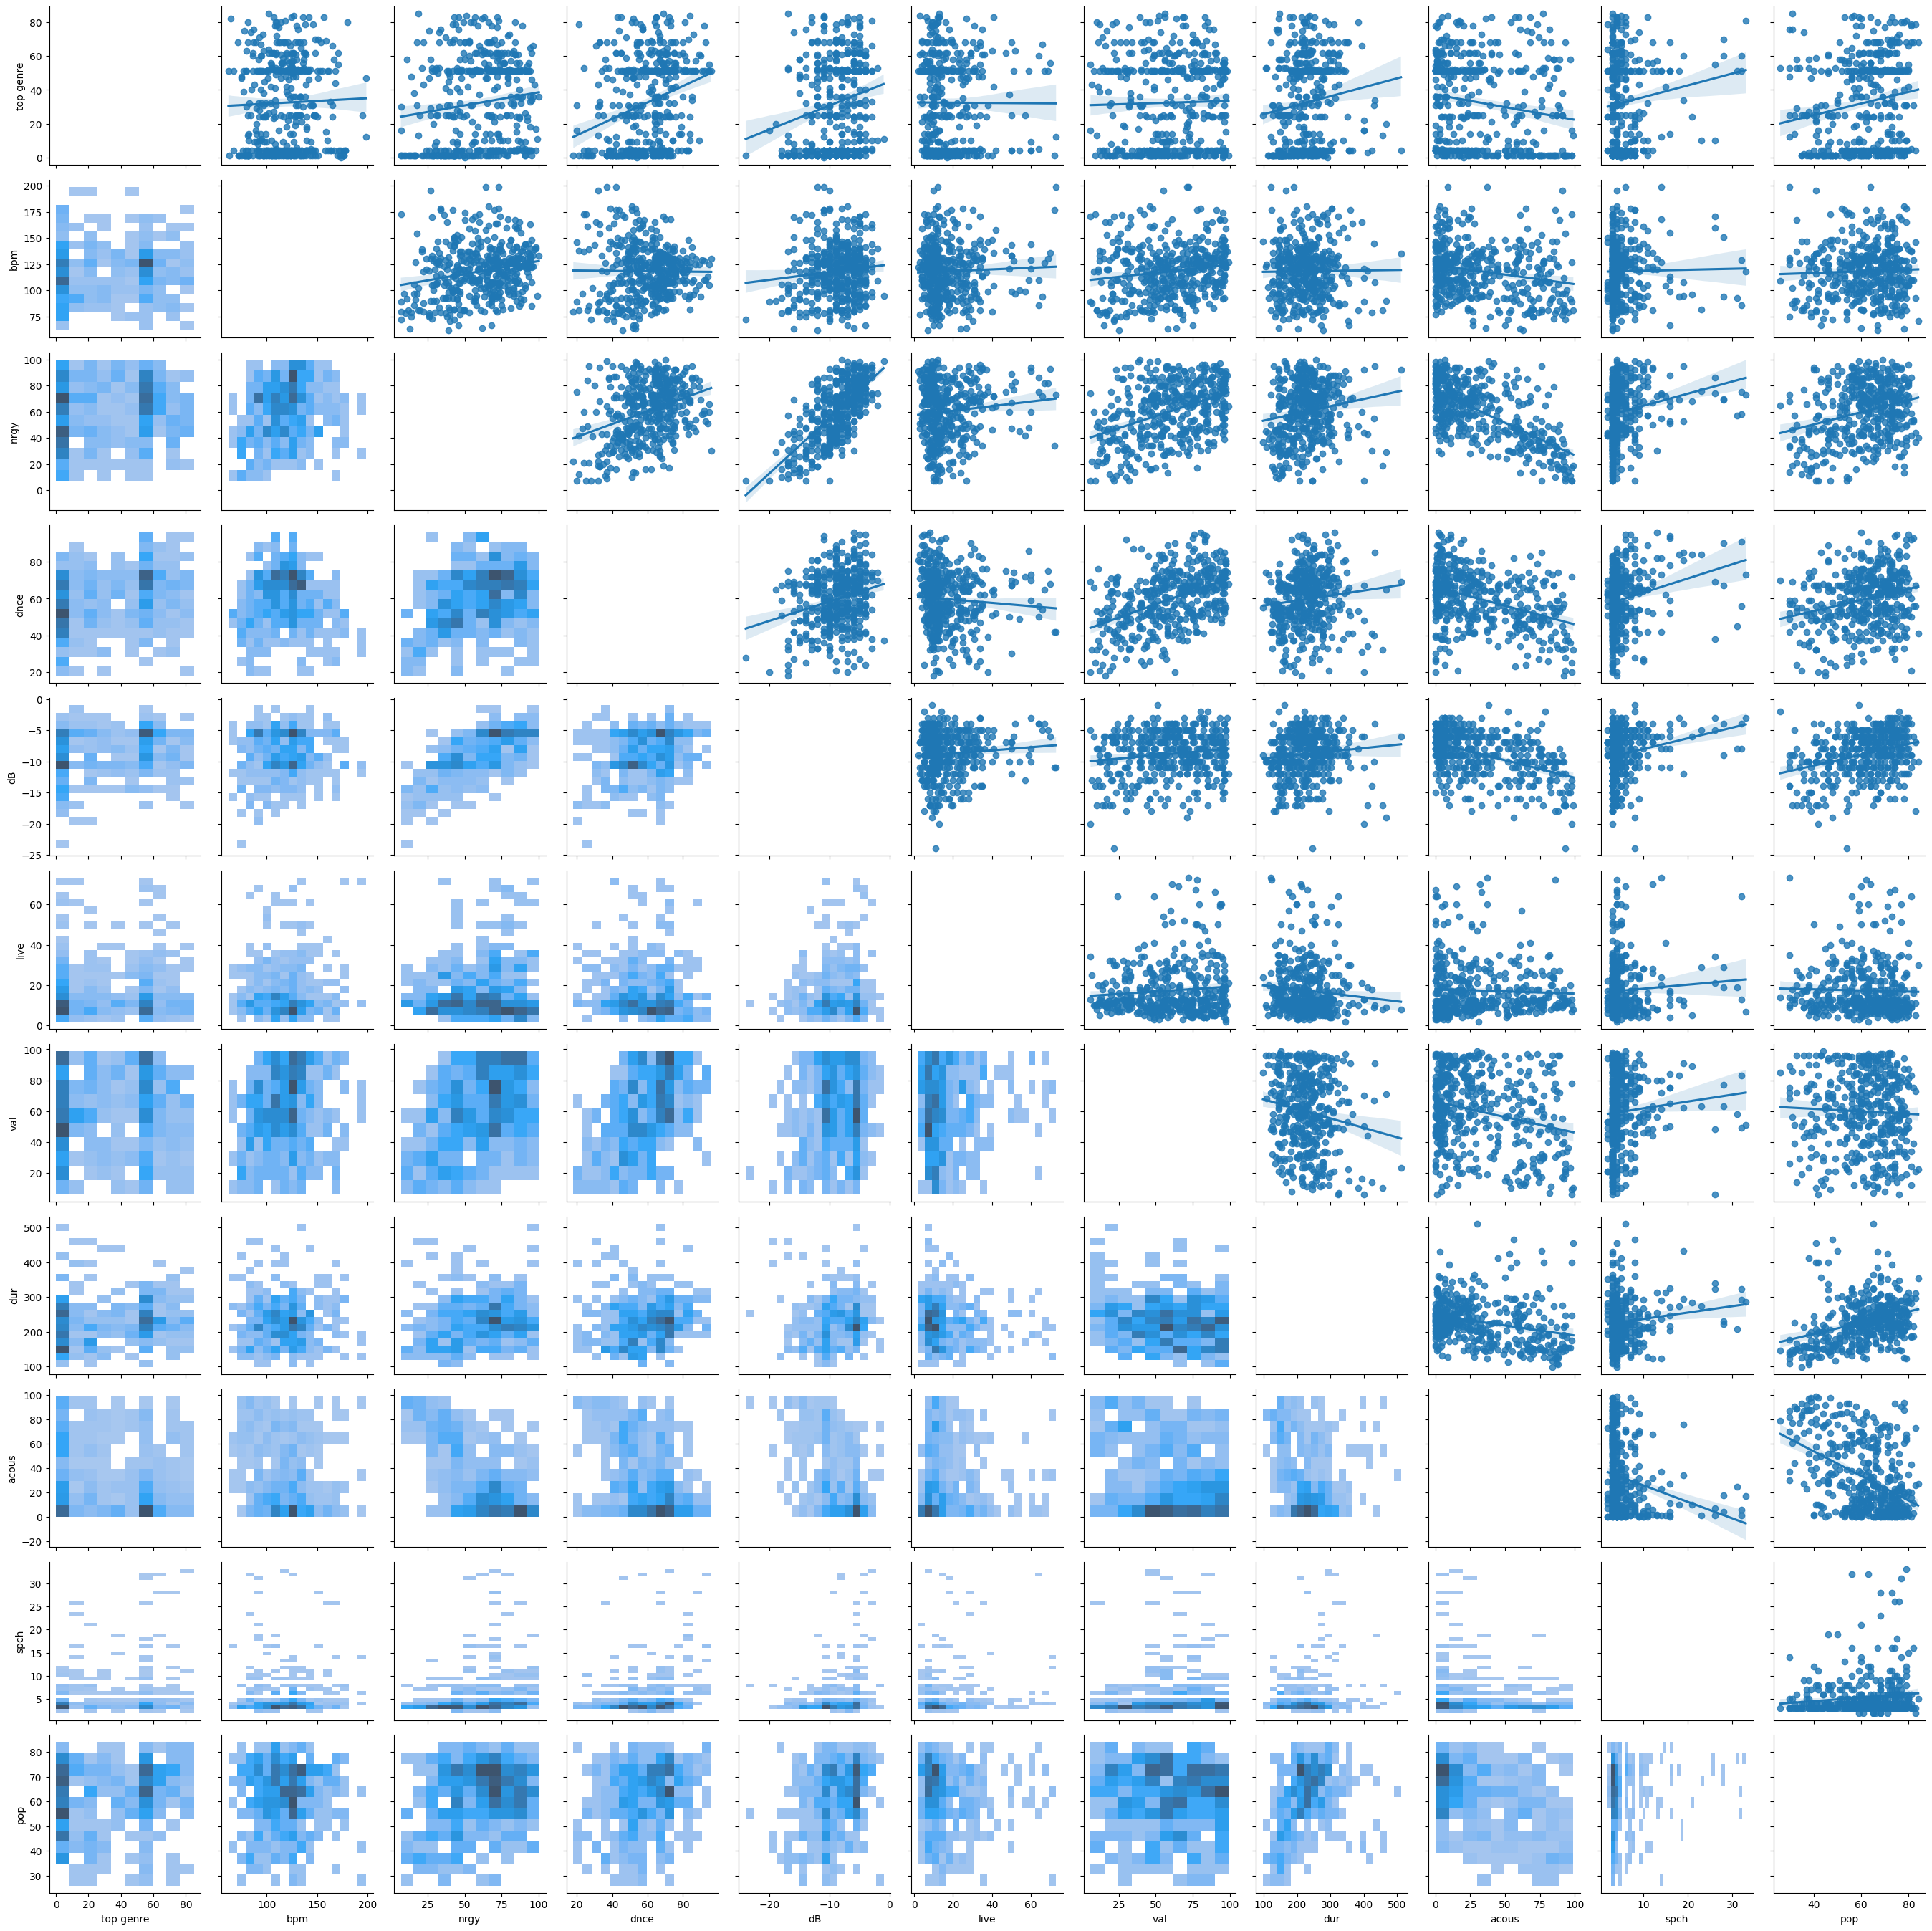

In [386]:
g = sns.PairGrid(trainDataClean.drop(columns=["Id","artist","title","year"]))

g.map_upper(sns.regplot)
g.map_lower(sns.histplot)

In [387]:
# seperate list - test data
xTest = testDataClean.drop(columns=["top genre","Id","artist","title","year"])

stdScaler = StandardScaler()
xScaledTest = stdScaler.fit_transform(xTest)

polyFeat = PolynomialFeatures(degree=2, include_bias=False)
xPolyScaledTest = polyFeat.fit_transform(xTest)
xPolyScaledTest = stdScaler.fit_transform(xPolyScaledTest)

In [388]:
# 1)Decision Tree Regression
# scaled x is not applied for this sample as decision tree do not require scaling
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(min_samples_leaf=5) # explore min_samples = e.g. put to 1 to see what happens
tree.fit(x,y)
#predTreeTrain = tree.predict(x) # Check fit
#linearMse = mean_squared_error(y, predTreeTrain)
#linearRmse = np.sqrt(linearMse)
#print("Tree Rmse:",linearRmse)
# Check on test set
predTreeTest = tree.predict(xTest) 
print(predTreeTest)
np.savetxt("my_data_tree.csv", predTreeTest, delimiter=",", 
           header="pop", comments="")

[75.14285714 71.16666667 53.66666667 51.375      67.42857143 72.4
 53.66666667 32.2        71.16666667 62.25       70.66666667 59.33333333
 70.66666667 75.         75.14285714 55.16666667 52.375      68.4
 65.71428571 65.83333333 39.2        52.71428571 67.42857143 32.2
 58.16666667 68.6        60.5        57.66666667 53.33333333 75.
 73.4        49.         75.         71.16666667 68.6        75.14285714
 61.25       53.66666667 68.4        63.6        75.2        75.2
 59.33333333 37.4        75.         66.28571429 62.25       47.
 68.8        64.28571429 49.         75.2        58.16666667 35.125
 61.57142857 57.66666667 72.4        52.375      68.42857143 32.2
 55.16666667 71.16666667 72.22222222 72.22222222 68.42857143 68.4
 78.4        53.66666667 61.25       47.         72.22222222 61.57142857
 47.875      63.6        61.57142857 77.16666667 72.22222222 71.28571429
 78.4        47.875      77.16666667 70.83333333 40.83333333 73.16666667
 52.71428571 70.         67.33333333 60.5

In [389]:
# 2) poly SVR
# instead of scaled x , we use scaled polynomial featured x (degree=2)as we are going to apply poly SVR(degree=2))
from sklearn.svm import SVR
svrPoly = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
#ßsvrPoly.fit(xTrainPoly,yTrainPoly)
#ypred = svrPoly.predict(xTrainPolyTest)
#linearMse = mean_squared_error(yTrainPolyTest, ypred)
#linearRmse = np.sqrt(linearMse)
#print("linearRmse",linearRmse)

# Check on test set
svrPoly.fit(xPolyScaled,y)
predSVRPolyTest = svrPoly.predict(xPolyScaledTest) 
print(predSVRPolyTest)
np.savetxt("my_data_SVR.csv", predSVRPolyTest, delimiter=",", 
           header="pop", comments="")

[ 58.24833616  68.01136656  55.99063932  58.20206213  59.05041006
  68.81780482  57.93494898  40.98472746  66.67807857  67.06524822
  53.05283798  67.57106053  45.17546928  65.30146083  69.17986347
  63.92692836  59.46496021  64.5397226   80.23568862  64.37894084
  66.0624712   61.54270328  49.39289538  59.59844389  49.76815315
  67.94845846  60.1299741   60.18196181  50.98143096  86.40927682
  68.15924363  62.65919743  70.3066188   69.14476555  67.95024786
  84.52750753  62.85289675  51.91144827  61.43377203  65.3226897
  68.88809026  64.97992281  71.30007482  58.10064468  68.26401941
  58.55883715  59.53871732  77.1219083   66.4407787   63.70980476
  57.61603168  67.84157291  65.06402821  54.6748385   69.95535486
  63.24148686  66.55297928  51.48769488  70.5136855   46.01668243
  62.48933202  68.43804744  68.16098764  64.28970094  67.52303696
  54.42272799  78.40136779  49.63765502  64.25173094  62.64791813
  65.76911149  53.9474677   56.66765717  67.05697025  64.74212236
  73.493090

In [395]:
# 3) bagging with polySVR
from sklearn.ensemble import BaggingRegressor

baggedPolySVRReg = BaggingRegressor(base_estimator=SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale"),n_estimators=10, random_state=0,bootstrap=True, n_jobs=-1)
#baggedPolySVRReg.fit(xTrainPoly,yTrainPoly)
#ypred = baggedPolySVRReg.predict(xTrainPolyTest)
#linearMse = mean_squared_error(yTrainPolyTest, ypred)
#linearRmse = np.sqrt(linearMse)
#print("linearRmse",linearRmse)

# Check on test set
baggedPolySVRReg.fit(xPolyScaled,y)
predbaggedSVRPolyTest = baggedPolySVRReg.predict(xPolyScaledTest)     
print(predbaggedSVRPolyTest)
np.savetxt("my_data_bagged_SVR.csv", predbaggedSVRPolyTest, delimiter=",", 
           header="pop", comments="")

[ 58.40908768  67.70692827  57.27898763  59.7908859   59.59573518
  69.70190455  61.16595984  38.49818624  66.88423614  68.60893207
  54.78319361  66.4624868   46.72471595  67.23479366  67.98264532
  64.2718913   61.1872386   65.78364002  81.26481425  66.01159407
  65.53405293  61.26213997  47.77573925  52.29276198  78.29257727
  67.35965653  59.91850923  59.82208048  50.31517988  85.7708681
  66.72850689  60.39178722  74.35894013  69.14451964  69.47581536
  85.98123322  63.06258505  56.68949014  60.35067479  64.83402183
  68.53012219  51.9301899   70.79023535  54.32566219  72.2950268
  60.41781197  56.88667764  63.1248727   64.68757275  64.21085953
  56.07525991  65.52573447  69.64026228  48.32900067  62.2272378
  63.43922316  68.10824959  48.64594493  71.98879861  43.43626549
  60.74538701  72.85929792  68.42073582  64.22456734  69.86694863
  50.18342891  65.94290319  53.12851146  65.97543894  66.4908707
  67.33636807  49.77676921  55.94785617  67.95426825  63.13371927
  73.67844621 

In [391]:
# 4) bagging with randomForest

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

baggedRFReg = BaggingRegressor(base_estimator=RandomForestRegressor(max_leaf_nodes=50, n_jobs=-1),n_estimators=10, random_state=0,bootstrap=True, n_jobs=-1)
#baggedRFReg.fit(xTrain,yTrain)
#ypred = baggedRFReg.predict(xTrainTest)
#linearMse = mean_squared_error(yTrainTest, ypred)
#linearRmse = np.sqrt(linearMse)
#print("linearRmse",linearRmse)

# Check on test set
baggedRFReg.fit(xPolyScaled,y)
predbaggedSVRPolyTest = baggedRFReg.predict(xPolyScaledTest)     
print(predbaggedSVRPolyTest)
np.savetxt("my_data_bagged_SVR.csv", predbaggedSVRPolyTest, delimiter=",", 
           header="pop", comments="")

[68.10777519 63.09742855 57.12376154 62.34840892 53.11917274 66.16829827
 57.88582556 41.82153408 67.6043731  66.75554444 58.27163296 68.22824963
 55.73265188 62.87087726 67.43393251 65.2520946  59.72190471 64.53764466
 64.89160651 67.78825309 56.77997907 56.77336421 51.31228063 49.48254294
 52.69308818 65.86805371 62.49166475 56.29631504 49.7976807  69.98733022
 68.17020353 54.82993685 66.72520583 69.46278803 66.7384876  70.90573759
 63.05869565 58.58229173 63.21945126 65.7754561  67.39000533 62.33052469
 64.1383468  47.08220805 61.79400941 59.32790179 64.3275443  58.93055562
 62.48830908 64.31578531 52.01546379 65.09106445 60.58168325 49.98222863
 62.51911369 58.91691199 66.49813146 51.52208257 69.94138747 48.06842293
 61.2265409  65.4216083  66.4487815  64.43346097 68.31931525 61.21602991
 65.59743218 57.18652838 62.87571499 57.74926893 66.51200369 55.20464194
 56.71562046 64.09174358 59.91865729 66.72404956 68.81785733 63.66958446
 62.05224185 57.88941355 66.49821607 58.31611578 47

In [392]:
rf = RandomForestRegressor(max_leaf_nodes=50, n_jobs=-1)
rf.fit(xScaled,y)
rf.feature_importances_

array([0.06609787, 0.0895908 , 0.08277333, 0.07975792, 0.04662698,
       0.06677087, 0.37827864, 0.14523566, 0.04486791])

In [393]:
# 5) Gradient Boosting Regressor
# train data
from sklearn.ensemble import GradientBoostingRegressor
gradBoostReg = GradientBoostingRegressor(random_state=0)
#ßßgradBoostReg.fit(xTrain,yTrain)
#ypred = gradBoostReg.predict(xTrainTest)
#linearMse = mean_squared_error(yTrainTest, ypred)
#linearRmse = np.sqrt(linearMse)
#print("linearRmse",linearRmse)

# test data
gradBoostReg.fit(xScaled,y)
predGradBoostReg = gradBoostReg.predict(xScaledTest)     
print(predGradBoostReg)
np.savetxt("my_data_grad_boost.csv", predGradBoostReg, delimiter=",", 
           header="pop", comments="")

[67.65218312 69.8617837  58.83974965 62.250018   53.00829973 67.43429154
 56.48764119 39.19423395 66.09535812 59.37033044 60.88574862 61.51494905
 62.90598243 63.26583084 66.0518012  63.39300035 61.69390041 63.90551668
 67.00294153 67.20739762 53.41829717 57.28155638 55.63783453 45.09858577
 51.23834768 69.20748591 61.89850506 49.4544457  47.01914024 67.39133908
 68.2331605  52.79586296 67.32501531 67.41375646 66.75288827 73.38587465
 64.98523622 55.63780861 66.37213841 67.9296339  65.58353522 61.56244082
 64.65041849 44.59856205 66.8546173  62.40886024 62.23691233 58.9639487
 57.3356368  63.21822339 54.83371102 65.14635602 64.57336796 44.71859294
 66.04839502 63.36262834 68.52445461 57.07022833 69.1487118  43.48062082
 65.50294475 67.06236755 65.74466336 69.2367458  69.01032844 67.62075924
 65.58550818 56.97405164 65.5280041  63.38587887 67.95777186 67.50897442
 57.0896977  64.21864051 56.31741495 66.92458315 71.05835022 66.53063202
 56.2928129  57.57584294 67.53908278 60.42890556 50.